In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 12

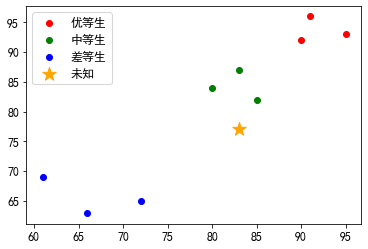

In [2]:
good = np.array([[95, 93], [90, 92], [91, 96]])
medium = np.array([[85, 82], [83, 87], [80, 84]])
bad = np.array([[61, 69], [66, 63], [72, 65]])
unknown = np.array([[83, 77]])

plt.scatter(good[:, 0], good[:, 1], color="r", label="优等生")
plt.scatter(medium[:, 0], medium[:, 1], color="g", label="中等生")
plt.scatter(bad[:, 0], bad[:, 1], color="b", label="差等生")
plt.scatter(unknown[:, 0], unknown[:, 1], color="orange", marker="*",
            s=200, label="未知")
plt.legend()

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

iris = load_iris()
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

knn = KNeighborsClassifier(n_neighbors=3, weights="uniform")
# n_neighbors：邻居的数量。
# weights：权重计算方式。可选值为uniform与distance。
# uniform：所有样本统一权重。
# distance：样本权重与距离成反比。

knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.78      0.44      0.56        16
           2       0.44      0.78      0.56         9

    accuracy                           0.71        38
   macro avg       0.74      0.74      0.71        38
weighted avg       0.77      0.71      0.71        38



In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y):
    color = ["r", "g", "b"]
    marker = ["o", "v", "x"]
    class_label = np.unique(y)
    cmap = ListedColormap(color[: len(class_label)])
    cm_light = ListedColormap(['#FFA0A0', '#A0FFA0', '#A0A0FF'])
    
    x1_min, x2_min = np.min(X, axis=0)
    x1_max, x2_max = np.max(X, axis=0)
    x1 = np.arange(x1_min - 1, x1_max + 1, 0.02)
    x2 = np.arange(x2_min - 1, x2_max + 1, 0.02)
    X1, X2 = np.meshgrid(x1, x2)
    Z = model.predict(np.c_[X1.ravel(), X2.ravel()])
    Z = Z.reshape(X1.shape)
    plt.contourf(X1, X2, Z, cmap=cmap, alpha=0.5)  # 画等高线

    for i, class_ in enumerate(class_label):
        plt.scatter(x=X[y == class_, 0], y=X[y == class_, 1], c=cmap.colors[i], 
                    label=class_, marker=marker[i])
    plt.legend()

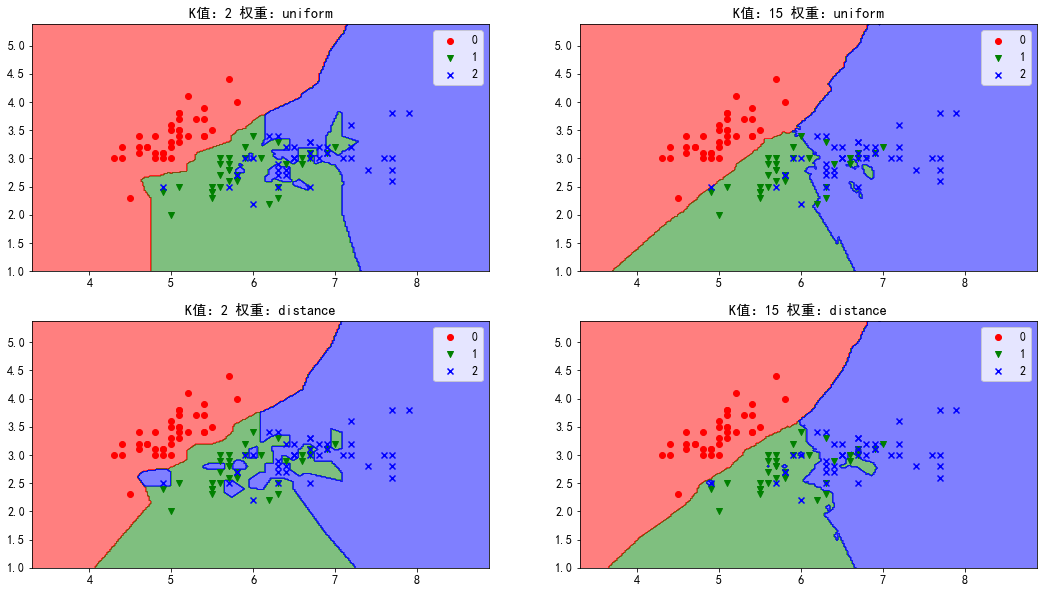

In [5]:
from itertools import product

weights = ['uniform', 'distance']
ks = [2, 15]
plt.figure(figsize=(18, 10))
# 计算weights与ks的笛卡尔积组合。这样就可以使用单层循环取代嵌套循环，
# 增加代码可读性与可理解性。
for i, (w, k) in enumerate(product(weights, ks), start=1):
    plt.subplot(2, 2, i)
    plt.title(f"K值：{k} 权重：{w}")
    knn = KNeighborsClassifier(n_neighbors=k, weights=w)
    knn.fit(X, y)
    plot_decision_boundary(knn, X_train, y_train)

In [6]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

# 模型的所有参数
knn.get_params().keys()

grid = {"n_neighbors": range(1, 11, 1), "weights": ['uniform', 'distance']}

gs = GridSearchCV(estimator=knn, param_grid=grid,
                  scoring="accuracy", n_jobs=-1, cv=3, verbose=10)
# estimator：评估器，即对哪个模型调整超参数。
# param_grid：需要检验的超参数组合。从这些组合中，寻找效果最好的超参数组合。
#             这里的键必须是模型的参数
# scoring：模型评估标准。
# n_jobs：并发数量。
# cv：交叉验证折数。
# verbose：输出冗余信息，值越大，输出的信息越多。
gs.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1975s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0200s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 11),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=10)

In [7]:
# 最好的分值。
print(gs.best_score_)

# 最好的超参数组合。
print(gs.best_params_)

0.7773826458036984
{'n_neighbors': 9, 'weights': 'uniform'}


In [8]:
# 使用最好的超参数训练好的模型。
estimator = gs.best_estimator_
print(estimator)

y_hat = estimator.predict(X_test)
print(y_hat)

print(classification_report(y_test, y_hat))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')
[1 1 0 2 0 2 0 2 2 2 2 2 2 2 2 0 2 1 0 0 1 1 0 0 2 0 0 2 1 0 2 1 0 2 2 1 0
 2]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.75      0.38      0.50        16
           2       0.41      0.78      0.54         9

    accuracy                           0.68        38
   macro avg       0.72      0.72      0.68        38
weighted avg       0.76      0.68      0.68        38



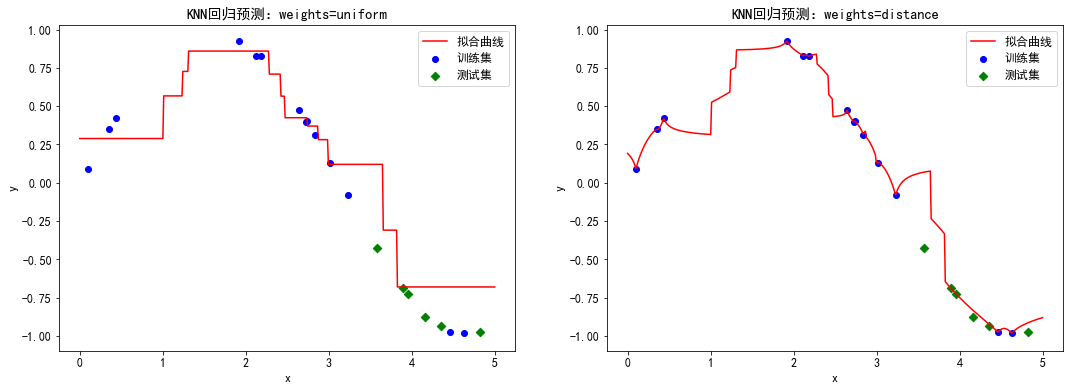

In [9]:
from sklearn.neighbors import KNeighborsRegressor

np.random.seed(0)
# 在[0, 5)的范围内，随机生成若干x点
x = 5 * np.random.random(20)
X = x[:, np.newaxis]
y = np.sin(x) + np.random.normal(0, 0.01, size=len(x))  # 均值, 标准差, 形状

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
plt.figure(figsize=(18, 6))
for i, weights in enumerate(['uniform', 'distance']):
    plt.subplot(1, 2, i + 1)
    knn = KNeighborsRegressor(n_neighbors=3, weights=weights)
    knn.fit(X_train, y_train)
    plt.scatter(X_train, y_train, c="b", marker="o", label="训练集")
    plt.scatter(X_test, y_test, c="g", marker="D", label="测试集")

    t = np.linspace(0, 5, 500).reshape(-1, 1)
    plt.plot(t, knn.predict(t), c="r", label="拟合曲线")
    plt.legend()
    plt.title(f"KNN回归预测：weights={weights}")
    plt.xlabel("x")
    plt.ylabel("y")